In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import torchvision
import numpy as np

%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=[0],std=[1])])

In [3]:
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [4]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                                batch_size = 64,
                                                shuffle = True,
                                                 num_workers=2)

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = 64,
                                               shuffle = True,
                                                num_workers=2)

In [5]:
print(len(data_train))

60000


In [6]:
# 初试化版本一，使用net.apply(initFunction)
#from torch.nn import init
# #define the initial function to init the layer's parameters for the network
# def weigth_init(m):
#     if isinstance(m, nn.Conv2d):
#         init.xavier_uniform_(m.weight.data)
#         init.constant_(m.bias.data,0.1)
#     elif isinstance(m, nn.BatchNorm2d):
#         m.weight.data.fill_(1)
#         m.bias.data.zero_()
#     elif isinstance(m, nn.Linear):
#         m.weight.data.normal_(0,0.01)
#         m.bias.data.zero_()
#     #Define Network
#     model = Net(args.input_channel,args.output_channel)
#     model.apply(weigth_init)

#     初始化神经网络版本二，使用xavier_uniform()
#     def initNetParams(net):
#     '''Init net parameters.'''
#     for m in net.modules():
#         if isinstance(m, nn.Conv2d):
#             init.xavier_uniform(m.weight)
#             if m.bias:
#                 init.constant(m.bias, 0)
#         elif isinstance(m, nn.BatchNorm2d):
#             init.constant(m.weight, 1)
#             init.constant(m.bias, 0)
#         elif isinstance(m, nn.Linear):
#             init.normal(m.weight, std=1e-3)
#             if m.bias:
#                 init.constant(m.bias, 0)
 
# initNetParams(net)

#初始化神经网络的函数有
#torch.nn.init.uniform_(tensor, a=0, b=1)、
#torch.nn.init.normal_(tensor, mean=0, std=1)
#torch.nn.init.constant_(tensor, val)
#以下两种可以保证输入、输出方差相同
#torch.nn.init.xavier_uniform_(tensor, gain=1)
#torch.nn.init.xavier_normal_(tensor, gain=1)

[tensor(9), tensor(5), tensor(9), tensor(2), tensor(7), tensor(6), tensor(4), tensor(8), tensor(0), tensor(4), tensor(4), tensor(7), tensor(6), tensor(9), tensor(7), tensor(7), tensor(5), tensor(9), tensor(3), tensor(7), tensor(6), tensor(2), tensor(2), tensor(9), tensor(3), tensor(6), tensor(5), tensor(0), tensor(2), tensor(4), tensor(3), tensor(9), tensor(8), tensor(4), tensor(2), tensor(3), tensor(2), tensor(9), tensor(3), tensor(6), tensor(0), tensor(3), tensor(6), tensor(5), tensor(9), tensor(2), tensor(2), tensor(2), tensor(2), tensor(4), tensor(2), tensor(3), tensor(5), tensor(2), tensor(9), tensor(5), tensor(2), tensor(3), tensor(9), tensor(1), tensor(5), tensor(2), tensor(7), tensor(9)]


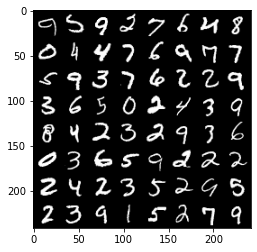

In [7]:
images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [1]
mean = [0]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [8]:
from torch.nn import init
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        hidden_size,mid_size,output_size = 28*28,128,10
        self.net = torch.nn.Sequential( torch.nn.Flatten(),
                                        torch.nn.Linear(hidden_size, mid_size),
                                        torch.nn.ReLU(),
                                        torch.nn.Linear(mid_size, output_size),
                                        torch.nn.Softmax(dim=1)
                                      )
        
    def forward(self, x):
        out = self.net(x)
        return out

In [9]:
model = Model()

In [10]:
print(model)

Model(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


In [11]:
cost = torch.nn.CrossEntropyLoss()#交叉熵只能处理浮点数，但是经过sigmoid后的输出，以及lable都是整型数据
lr = 1e-2
optimizer = torch.optim.Adam(model.parameters(),lr)
n_epochs = 10


In [12]:
Flatten = torch.nn.Flatten()
for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch, n_epochs))
    print("-"*10)
    for data in data_loader_train:
        X_train, y_train = data
        outputs = model(X_train)#outputs.shape = batch_size*output_size
        _,pred = torch.max(outputs,1)#所以需要在1的维度进行取最大
        
        loss = cost(outputs, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
        running_correct += torch.sum(pred == y_train)
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        outputs = model(X_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test)
    print("Loss is:{:.4f}, Train Accuracy is:{:.4f}%, Test Accuracy is:{:.4f}%".format(running_loss/len(data_train),
                                                                                      100*running_correct/len(data_train),
                                                                                      100*testing_correct/len(data_test)))

torch.save(model.state_dict(), "model_parameter.pkl")

Epoch 0/10
----------
Loss is:0.0254, Train Accuracy is:83.5850%, Test Accuracy is:91.1400%
Epoch 1/10
----------
Loss is:0.0239, Train Accuracy is:93.1383%, Test Accuracy is:91.0700%
Epoch 2/10
----------
Loss is:0.0238, Train Accuracy is:94.1367%, Test Accuracy is:95.3600%
Epoch 3/10
----------
Loss is:0.0238, Train Accuracy is:94.1583%, Test Accuracy is:93.9900%
Epoch 4/10
----------
Loss is:0.0237, Train Accuracy is:94.7017%, Test Accuracy is:94.3600%
Epoch 5/10
----------
Loss is:0.0237, Train Accuracy is:94.5983%, Test Accuracy is:94.6000%
Epoch 6/10
----------
Loss is:0.0236, Train Accuracy is:95.0350%, Test Accuracy is:95.3200%
Epoch 7/10
----------
Loss is:0.0237, Train Accuracy is:94.5933%, Test Accuracy is:94.5800%
Epoch 8/10
----------
Loss is:0.0236, Train Accuracy is:95.0250%, Test Accuracy is:95.0800%
Epoch 9/10
----------
Loss is:0.0235, Train Accuracy is:95.4750%, Test Accuracy is:95.6000%


Predict Label is: [tensor(1), tensor(6), tensor(6), tensor(4)]
Real Label is: [tensor(1), tensor(6), tensor(6), tensor(4)]


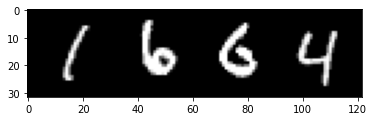

In [13]:
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))

pred = model(X_test)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Real Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose(1,2,0)

std = [1]
mean = [0]
img = img*std+mean
plt.imshow(img)
    